# Assigment 3

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#1. Shape of dataset
df.shape 

(48842, 15)

In [4]:
#2. Print column names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
#3. How many men and women (sex feature) are represented in this dataset?
count=df['gender'].value_counts()
print("Number of mens::",count['Male'])
print("Number of womens::",count['Female'])

Number of mens:: 32650
Number of womens:: 16192


In [6]:
#4. What is the average age (age feature) of women?
avg_age=df[df['gender']=='Female']['age'].mean()
print("avg age of women::",round(avg_age))

avg age of women:: 37


In [7]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [8]:
#5. What is the percentage of German citizens (native-country feature)?
germany=df[df['native-country']=='Germany']
german_cnt=germany['native-country'].count()
percentage=(german_cnt/len(df))*100
print("percentage count of german citizens::",round(percentage,3))

percentage count of german citizens:: 0.422


In [9]:
# 6. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature)
# and those who eam less than 50K per year.
more_than_50k=df[df['income']==">50K"]['age']
less_than_50k=df[df['income']=="<=50K"]['age']
mean_1=more_than_50k.mean()
std_1=more_than_50k.std()

mean_2=less_than_50k.mean()
std_2=less_than_50k.std()
print('mean for salary more than 50K',round(mean_1,3))
print('std for salary more than 50K',round(std_1,3))

print("mean for salary less than 50k",round(mean_2,3))
print("std for salary less than 50k",round(std_2,3))


mean for salary more than 50K 44.275
std for salary more than 50K 10.559
mean for salary less than 50k 36.872
std for salary less than 50k 14.104


In [10]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [11]:
# 7. that people who earn more than 50K have at least high school education?
# (edicaton-Bachelors, Prof-school Love-an, Anse-soc, Masters or Doctorate feature)
edu=["Bachelors", "Prof-school", "Some-college", "Masters", "Doctorate", "Assoc-acdm", "Assoc-voc"]
higher_edu=edu = df[df['income'] == '>50K']['education'].isin(edu).mean()
print("percentage of people who has income mre than 50k::",round(higher_edu*100,2),"%") 
print("in the data around 75.45% people who earn more than 50K has at least completed there higher education ")

percentage of people who has income mre than 50k:: 75.45 %
in the data around 75.45% people who earn more than 50K has at least completed there higher education 


In [12]:
edu = df[df['income'] == '>50K']['education']


In [13]:
# 8. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe().
# Find the maximum age of men of Amer Inhan Eskimo race.
age_stats = df.groupby(["race", "gender"])["age"].describe()
print(age_stats)

max_age = df[(df["race"] == "Amer-Indian-Eskimo") & (df["gender"] == "Male")]["age"].max()
print("Maximum age of Amer-Indian-Eskimo men:", max_age)


                             count       mean        std   min   25%   50%  \
race               gender                                                    
Amer-Indian-Eskimo Female    185.0  36.237838  12.840056  17.0  26.0  35.0   
                   Male      285.0  36.989474  11.703943  17.0  29.0  35.0   
Asian-Pac-Islander Female    517.0  35.657640  12.637799  17.0  25.0  34.0   
                   Male     1002.0  38.994012  12.824878  18.0  29.0  37.0   
Black              Female   2308.0  37.905979  12.736001  17.0  28.0  36.0   
                   Male     2377.0  37.922592  13.036981  17.0  28.0  36.0   
Other              Female    155.0  31.212903  11.233061  17.0  23.0  29.0   
                   Male      251.0  35.167331  11.808297  17.0  26.0  32.0   
White              Female  13027.0  36.882935  14.454178  17.0  25.0  35.0   
                   Male    28735.0  39.704507  13.475250  17.0  29.0  38.0   

                            75%   max  
race               gend

In [14]:
# 9. Amang whom is the proportion of these who earn a lot (>50K) greater married or single men (marital-status feature)? 
# Consider as married those who have a marital-status starting with Maried (Married civ-spouse, Married-spouse-absent or Maried-AF-spouse), the rest are considered bachelors.

df["marital-status"] = df["marital-status"].apply(lambda x: "Married" if x.startswith("Married") else "Single")

married_high_earners = df[(df["marital-status"] == "Married") & (df["gender"] == "Male")]["income"].eq(">50K").mean()
single_high_earners = df[(df["marital-status"] == "Single") & (df["gender"] == "Male")]["income"].eq(">50K").mean()
print("married_high_earners::",round(married_high_earners,3))
print("single_high_earners::",round(single_high_earners,3))

married_high_earners:: 0.441
single_high_earners:: 0.081


In [15]:
# 10. What is the maximun nanber of hours a person works per work (hars per-wool feature)? How many people work such a number of hours,
# and what is the percentage of those who carn a lot (>50K) among them
max_hours = df["hours-per-week"].max()
people_max = (df["hours-per-week"] == max_hours).sum()
high_earners= df[(df["hours-per-week"] == max_hours) & (df["income"] == ">50K")].shape[0]
percentage = (high_earners / people_max) * 100

print("Maximum hours per week worked:", max_hours)
print("Number of people working max hours:", people_max)
print("Percentage of more than 50K earners among them :", round(percentage, 2), "%")

Maximum hours per week worked: 99
Number of people working max hours: 137
Percentage of more than 50K earners among them : 29.93 %


# Pandas part 2


Dataset : College Placement Data


In [86]:
# 1. Display first 10 records
placement=pd.read_csv("student_placement.csv")
placement.head()

,student_id,name,gender,age,city,degree,cgpa,university,company,package,status
0,101,Aarav Sharma,Male,22,Mumbai,B.Tech,8.5,IIT Bombay,Google,12.0,Placed
1,102,Neha Verma,Female,23,Delhi,MBA,7.8,IIM Bangalore,Amazon,15.0,Placed
2,103,Sameer Khan,Male,21,Bangalore,BCA,6.9,Christ University,Infosys,6.0,Placed
3,104,Priya Desai,Female,22,Pune,B.Tech,8.2,COEP,Wipro,5.5,Placed
4,105,Rohan Joshi,Male,24,Hyderabad,M.Tech,9.1,IIIT Hyderabad,Microsoft,18.0,Placed


In [88]:
#2. display all columns in it
placement.columns

Index(['student_id', 'name', 'gender', 'age', 'city', 'degree', 'cgpa',
       'university', 'company', 'package', 'status'],
      dtype='object')

In [91]:
#3. Perform statistical analysis on it. 
print(placement.describe())  # Summary statistics
print(placement.info())     


       student_id        age       cgpa    package
count    50.00000  50.000000  50.000000  50.000000
mean    125.50000  22.440000   7.534000   8.042000
std      14.57738   1.052887   0.962694   6.333748
min     101.00000  21.000000   5.500000   0.000000
25%     113.25000  22.000000   6.825000   4.500000
50%     125.50000  22.000000   7.600000   6.000000
75%     137.75000  23.000000   8.275000  12.375000
max     150.00000  24.000000   9.200000  22.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  50 non-null     int64  
 1   name        50 non-null     object 
 2   gender      50 non-null     object 
 3   age         50 non-null     int64  
 4   city        50 non-null     object 
 5   degree      50 non-null     object 
 6   cgpa        50 non-null     float64
 7   university  50 non-null     object 
 8   company     40 non-null

In [93]:
#4. Check for the missing and duplicated values. 
print("Missing values:", placement.isnull().sum())  
print("Duplicate values:", placement.duplicated().sum())  


Missing values: student_id     0
name           0
gender         0
age            0
city           0
degree         0
cgpa           0
university     0
company       10
package        0
status         0
dtype: int64
Duplicate values: 0


In [103]:
#5. Display average CGPA by city. 
avg_cgpa = placement.groupby("city")["cgpa"].mean()
print(avg_cgpa)


city
Bangalore    7.583333
Chennai      6.725000
Delhi        7.600000
Hyderabad    7.342857
Jaipur       7.200000
Kolkata      8.050000
Mumbai       7.675000
Pune         7.666667
Name: cgpa, dtype: float64


In [100]:
#6. Display placement count by city
city_placement = placement.groupby("city")["status"].count()
print(city_placement)


city
Bangalore    6
Chennai      4
Delhi        9
Hyderabad    7
Jaipur       4
Kolkata      6
Mumbai       8
Pune         6
Name: status, dtype: int64


In [106]:
#7. Display the name of the city with the highest CGPA
highest_cgpa = placement.loc[placement["cgpa"].idxmax(), "city"]
print("City with highest CGPA:", highest_cgpa)


City with highest CGPA: Kolkata


In [111]:
#8. Display names of cities where placement is 1
placed_city = placement[placement["status"] == 'Placed']["city"].unique()
print("City with placement:",placed_city)



City with placement: ['Mumbai' 'Delhi' 'Bangalore' 'Pune' 'Hyderabad' 'Kolkata' 'Chennai'
 'Jaipur']


Pokemon DataFrame

In [16]:
#1. creating the pokemon DataFrame
data={"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'], 
"evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'], 
"type": ['grass', 'fire', 'water', 'bug'], 
"hp": [45, 39, 44, 45], 
"pokedex": ['yes', 'no','yes','no']}

pokemon=pd.DataFrame(data)
pokemon.head()

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


In [17]:
#2. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex
new_order= ["name", "type", "hp", "evolution", "pokedex"]
pokemon= pokemon.loc[:, new_order]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


In [18]:
# 3. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice 
pokemon['place']=['lake','parks','hills','forest']
pokemon=pokemon.iloc[:,[0,1,5,2,3,4]] #using .iloc we canchage the location of the column in the dataframe.the another way is .insert(index to where insert,[column name],[column values]) using this method can directly insert the colum at desired location 
pokemon

,name,type,place,hp,evolution,pokedex
0,Bulbasaur,grass,lake,45,Ivysaur,yes
1,Charmander,fire,parks,39,Charmeleon,no
2,Squirtle,water,hills,44,Wartortle,yes
3,Caterpie,bug,forest,45,Metapod,no


In [19]:
#4. Display all columns and their datatypes. 

pokemon.dtypes 

name         object
type         object
place        object
hp            int64
evolution    object
pokedex      object
dtype: object

In [25]:
#5. Display all the names whose pokedex status is “yes” 
a=pokemon[pokemon['pokedex']=='yes']['name']
print(a)

0    Bulbasaur
2     Squirtle
Name: name, dtype: object


In [23]:
#6. Display all names whose hp is in between 40 to 45 and type will be either fire or water 
b=pokemon[(pokemon['hp'].between(40,45))&(pokemon['type'].isin(['fire','water']))]
b

,name,type,place,hp,evolution,pokedex
2,Squirtle,water,hills,44,Wartortle,yes


In [33]:
#7. Convert the column pokedex into 1’s and 0’s. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #importing the label encoder from sklearn to perfrom the encoding on the pokedex column 
le.fit(pokemon.pokedex.drop_duplicates()) # thse line make sure that we only have unique value .fit will make sure that those unique value are assign to a number
pokemon.pokedex = le.transform(pokemon.pokedex)#we are replacing the numical value with the "yes" and "no" column 
#why label encoding?--->>we use the label encoding to convert the catogrical data into numerical data we use label encoding when the data has a natural order

In [35]:
pokemon.head()

,name,type,place,hp,evolution,pokedex
0,Bulbasaur,grass,lake,45,Ivysaur,1
1,Charmander,fire,parks,39,Charmeleon,0
2,Squirtle,water,hills,44,Wartortle,1
3,Caterpie,bug,forest,45,Metapod,0


3. Online Food Order Prediction


In [40]:
food=pd.read_csv("onlinefoods.csv")
food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


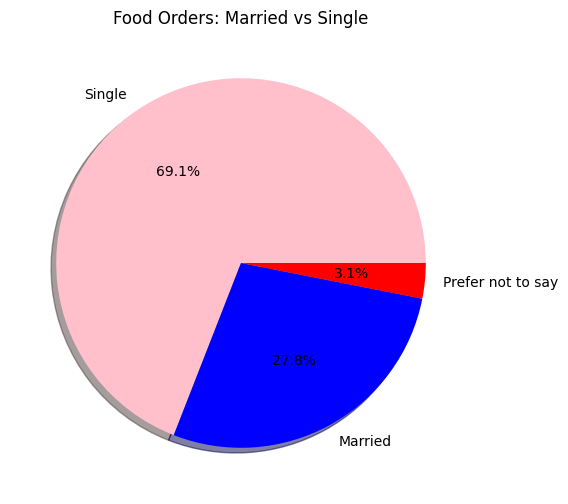

In [53]:
#1) Who orders food more ? Married or single( Make use of pie chart ) 
order_count = food["Marital Status"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(order_count, labels=order_count.index, autopct='%1.1f%%', colors=['pink','blue','red'],shadow=True)
plt.title("Food Orders: Married vs Single")
plt.show()

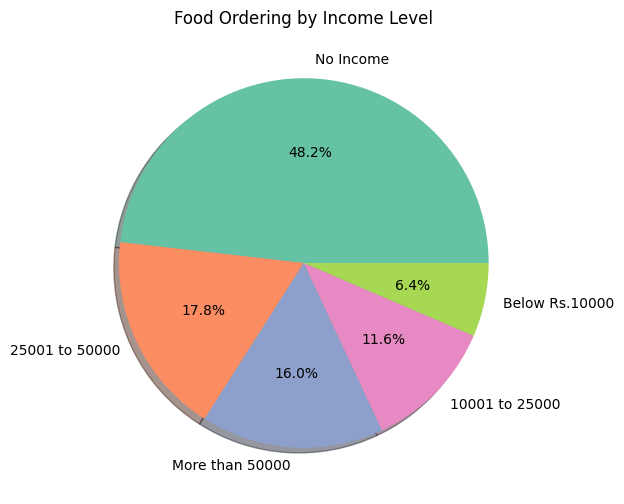

In [68]:
#2) Analyze food ordering behavior across Income Levels. ( Make use of pie chart ) 
income = food["Monthly Income"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(income_orders, labels=income.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'),shadow=True)
plt.title("Food Ordering by Income Level")
plt.show()


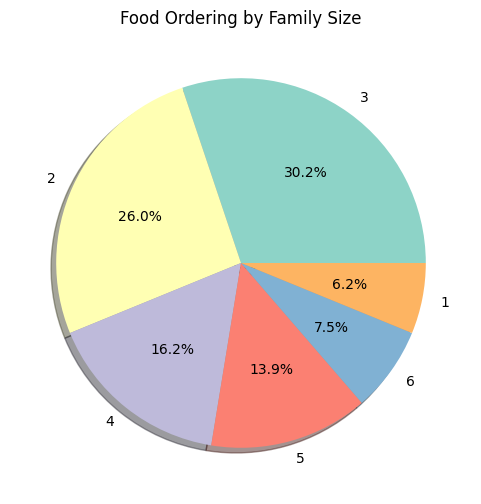

In [71]:
#3) Display Food ordering patterns based on family size. ( Make use of pie chart )
family_size_orders = food["Family size"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(family_size_orders, labels=family_size_orders.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"),shadow=True)
plt.title("Food Ordering by Family Size")
plt.show()


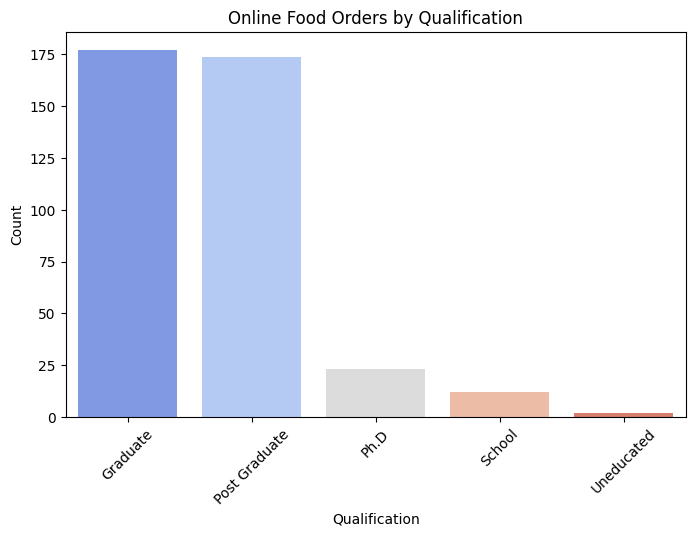

In [77]:
#4) Display the count of customers based on qualification, who orders online food.(Make use of bar chart) 
qualification_count = food["Educational Qualifications"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=qualification_count.index, y=qualification_count.values, palette="coolwarm")
plt.xlabel("Qualification")
plt.ylabel("Count")
plt.title("Online Food Orders by Qualification")
plt.xticks(rotation=45)
plt.show()


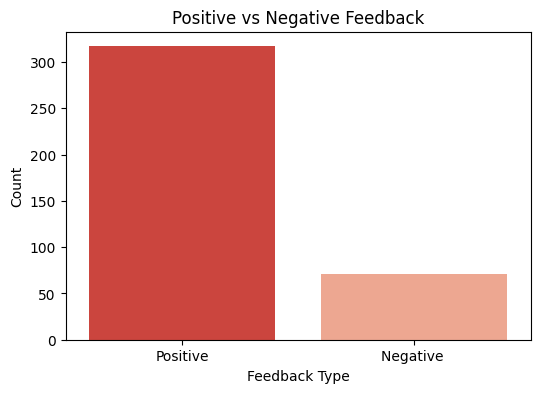

In [81]:
#5) Count of Positive and Negative Feedback (Bar Chart)
feedback= food["Feedback"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=feedback.index, y=feedback.values, palette="Reds_r")
plt.xlabel("Feedback Type")
plt.ylabel("Count")
plt.title("Positive vs Negative Feedback")
plt.show()